<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-[Chapter-02]-사이킷런으로-시작하는-머신러닝" data-toc-modified-id="1.-[Chapter-02]-사이킷런으로-시작하는-머신러닝-1">1. [Chapter 02] 사이킷런으로 시작하는 머신러닝</a></span><ul class="toc-item"><li><span><a href="#1.1-사이킷런-소개와-특징" data-toc-modified-id="1.1-사이킷런-소개와-특징-1.1">1.1 사이킷런 소개와 특징</a></span></li><li><span><a href="#1.2-붓꽃-품종-예측" data-toc-modified-id="1.2-붓꽃-품종-예측-1.2">1.2 붓꽃 품종 예측</a></span></li><li><span><a href="#1.3-사이킷런-프레임워크-및-주요-모듈" data-toc-modified-id="1.3-사이킷런-프레임워크-및-주요-모듈-1.3">1.3 사이킷런 프레임워크 및 주요 모듈</a></span></li><li><span><a href="#1.4-Model-Selection-모듈-소개" data-toc-modified-id="1.4-Model-Selection-모듈-소개-1.4">1.4 Model Selection 모듈 소개</a></span><ul class="toc-item"><li><span><a href="#1.4.1-K-폴드-교차-검증" data-toc-modified-id="1.4.1-K-폴드-교차-검증-1.4.1">1.4.1 K 폴드 교차 검증</a></span></li><li><span><a href="#1.4.2-Stratified-K-폴드" data-toc-modified-id="1.4.2-Stratified-K-폴드-1.4.2">1.4.2 Stratified K 폴드</a></span></li><li><span><a href="#1.4.3-cross_val_score()" data-toc-modified-id="1.4.3-cross_val_score()-1.4.3">1.4.3 cross_val_score()</a></span></li><li><span><a href="#1.4.4-GridSearchCV" data-toc-modified-id="1.4.4-GridSearchCV-1.4.4">1.4.4 GridSearchCV</a></span></li></ul></li><li><span><a href="#1.5-데이터-전처리" data-toc-modified-id="1.5-데이터-전처리-1.5">1.5 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#1.5.1-레이블-인코딩-(Label-Encoding)" data-toc-modified-id="1.5.1-레이블-인코딩-(Label-Encoding)-1.5.1">1.5.1 레이블 인코딩 (Label Encoding)</a></span></li><li><span><a href="#1.5.2-원-핫-인코딩-(One-Hot-Encoding)" data-toc-modified-id="1.5.2-원-핫-인코딩-(One-Hot-Encoding)-1.5.2">1.5.2 원-핫 인코딩 (One-Hot Encoding)</a></span></li><li><span><a href="#1.5.3-StandardScaler" data-toc-modified-id="1.5.3-StandardScaler-1.5.3">1.5.3 StandardScaler</a></span></li><li><span><a href="#1.5.4-MinMaxScaler" data-toc-modified-id="1.5.4-MinMaxScaler-1.5.4">1.5.4 MinMaxScaler</a></span></li></ul></li><li><span><a href="#1.6-캐글-타이타닉-생존자-예측" data-toc-modified-id="1.6-캐글-타이타닉-생존자-예측-1.6">1.6 캐글 타이타닉 생존자 예측</a></span></li></ul></li></ul></div>

# 1. [Chapter 02] 사이킷런으로 시작하는 머신러닝

## 1.1 사이킷런 소개와 특징

In [1]:
!conda install scikit-learn

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import sklearn
print(sklearn.__version__)

0.23.1


## 1.2 붓꽃 품종 예측

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

In [5]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target
print('iris target값: ', iris_label)
print('iris target명: ', iris.target_names)

iris target값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명:  ['setosa' 'versicolor' 'virginica']


In [6]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 0 : Setosa 품종, 1 : versicolor 품종, 2 : virginica 품종

In [7]:
# 학슴용, 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- train_test_split() : 학습 데이터와 테스트 데이터 분할


- test_size 옵션 : 전체 데이터 세트 중 테스트 데이터 세트의 비율


- random_state 옵션 : 수행할 때마다 동일한 데이터 세트로 분리하기 위해 일정한 숫자 값을 부여 (값은 상관 X)

In [8]:
# 분류 알고리즘 (의사 결정 트리) 으로 학습 및 예측

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

# 예측 수행
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [9]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


## 1.3 사이킷런 프레임워크 및 주요 모듈

- <b>지도학습</b> : Estimator 클래스 = Classifier(분류) + Regressor(회귀)

    Classifier - DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, GaussianNB, SVC
    
    Regressor - LinearRegression, Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor

    (Estimator 클래스는 fit()과 predict()를 내부에서 구현)
    
    
- <b>비지도학습</b> : 차원 축소, 클러스터링, 피처 추출 (대부분 fit()과 transform()을 적용)

In [10]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))     # 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [11]:
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


## 1.4 Model Selection 모듈 소개

- 과적합 문제를 개선하기 위해 교차 검증 이용


- 교차 검증 : 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가 수행

    K 폴드 교차 검증 : K개의 데이터 폴드 세트를 만들어 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
    
    Stratified K 폴드 : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식으로, 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배 (ex) 대출 사기 데이터 예측)
    
    cross_val_score() : classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 데이터 분할 (회귀의 경우 K 폴드 방식)

### 1.4.1 K 폴드 교차 검증

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

In [13]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


In [14]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'\
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도:  0.9


### 1.4.2 Stratified K 폴드

In [15]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

3개의 폴드 세트를 KFold로 생성하면 검증 예측 정확도는 0이 됨

In [16]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):     # 분포도 확인을 위해 레이블 데이터 세트도 인자로 추가
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [17]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'\
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도: ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도: ', np.round(np.mean(cv_accuracy),4))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도:  [0.98 0.94 0.98]
## 평균 검증 정확도:  0.9667


<b>** 일반적으로 분류에서의 교차 검증은 Stratified K 폴드를 사용하며, 회귀에서는 Stratified K 폴드가 지원되지 않음</b>

(회귀의 결정값은 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문)

### 1.4.3 cross_val_score()

내부에서 Estimator를 학습, 예측, 평가 시켜주므로 간단하게 교차 검증 수행

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


참고로 cross_validate()을 이용하면 여러 개의 평가 지표를 반환할 수 있으며 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공하지만, cross_val_score() 만으로도 충분하므로 cross_validate()은 생략

### 1.4.4 GridSearchCV

하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

cf) 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 개선

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth': [1,2,3], 'min_samples_split': [2,3]}

In [20]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 결정
# refit=True 가 default. True이면 가장 좋은 파라미터 설정으로 재학습
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


4, 5행의 예측 성능이 공동 1위를 기록하고 있으며, split_test_score는 3개의 폴딩 세트에서 각각 테스트한 성능 수치를 의미

In [21]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [22]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


<b>** 일반적으로 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가</b>

## 1.5 데이터 전처리 

- 데이터 인코딩 : 레이블 인코딩, 원-핫 인코딩


- 피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준(단위)으로 맞추는 작업. 표준화, 정규화

### 1.5.1 레이블 인코딩 (Label Encoding)

카테고리 피처를 코드형 숫자 값으로 변환. 트리 계열의 ML 알고리즘에 사용 가능

숫자 값의 크고 작음에 대한 특성이 반영되는 선형 회귀와 같은 ML 알고리즘에는 적용 X

In [23]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값: ', labels)

인코딩 변환값:  [0 1 4 5 3 3 2 2]


In [24]:
print('인코딩 클래스: ', encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [25]:
print('디코딩 원본값: ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### 1.5.2 원-핫 인코딩 (One-Hot Encoding)

레이블 인코딩의 문제점을 해결하기 위한 인코딩 방식

피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시

OneHotEncoder로 변환하기 전 모든 문자열 값이 숫자형 값으로 변환되어야 하며, 입력 값으로 2차원 데이터가 필요

(LabelEncoder() fit, transform -> 2차원 데이터로 변환 (reshape(-1,1)) -> OneHotEncoder() fit, transform)

<b>** 판다스의 get_dummies()를 이용하면 원-핫 인코딩을 더 쉽게 수행</b>

In [26]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 1.5.3 StandardScaler

개별 피처를 평균이 0이고, 분산이 1인 값으로 변환 (가우시안 정규 분포를 가질 수 있도록 데이터를 변환)

특히 SVM, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하기 때문에 사전에 표준화를 적용하는 것이 중요

In [27]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 가까운 값으로 변환

### 1.5.4 MinMaxScaler

데이터값을 0과 1 사이의 범위 값으로 변환 (음수가 있으면 -1에서 1값으로 변환)

데이터가 가우시안 분포가 아닐 경우에 적용하며, 적용 과정은 StandardScaler 와 동일

<b>** 스케일링 변환 시 유의점</b>
    
1) fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
    
2) 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용 (테스트 데이터에는 fit() 적용 X)

3) 2와 같은 주의 사항을 사전에 방지하고자, 되도록 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리

## 1.6 캐글 타이타닉 생존자 예측

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('./titanic/train.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [30]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [31]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [32]:
print('Sex 값 분포:\n', titanic['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
              ... 
B38              1
F E69            1
C49              1
A19              1
C46              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin(선실)의 경우 N이 687건으로 가장 많으며, 속성값도 제대로 정리 X

선실 등급을 나타내는 첫 번째 알파벳이 중요하므로, 앞 문자만 추출

In [33]:
titanic['Cabin'] = titanic['Cabin'].str[:1]
print(titanic['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [34]:
# 성별에 따른 생존자 수 비교
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survived 0은 사망, 1은 생존으로, 여자는 약 74%, 남자는 약 18%가 생존

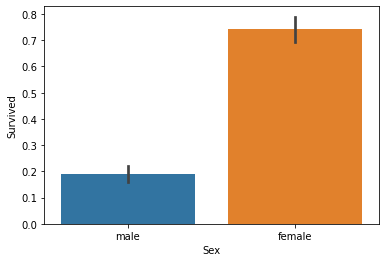

In [35]:
sns.barplot(x='Sex', y='Survived', data=titanic)

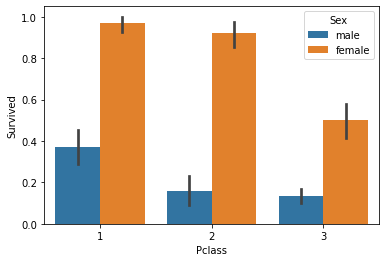

In [36]:
# 객실 등급별 성별에 따른 생존 확률 비교
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)

여성의 경우 삼등실의 생존 확률이 상대적으로 많이 떨어짐

남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음

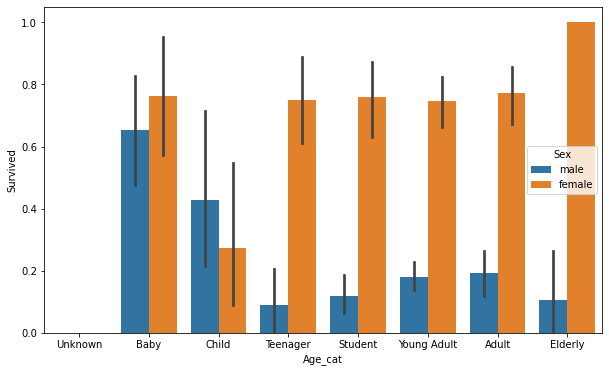

In [37]:
# Age에 따른 생존 확률 비교
# 입력 age에 따라 구분 값을 반환하는 함수 설정
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic['Age_cat'] = titanic['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic, order=group_names)
titanic.drop('Age_cat', axis=1, inplace=True)

In [38]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic = encode_features(titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


Sex, Cabin, Embarked 속성이 숫자형으로 변환

In [39]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [40]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic = pd.read_csv('./titanic/train.csv')
y_titanic = titanic['Survived']
X_titanic = titanic.drop('Survived', axis=1)

X_titanic = transform_features(X_titanic)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=11)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정트리 정확도: 0.7877
랜덤 포레스트 정확도: 0.8547
로지스틱 회귀 정확도: 0.8492


In [46]:
# 교차 검증으로 결정트리 모델 평가
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic)):
        X_train, X_test = X_titanic.values[train_index], X_titanic.values[test_index]
        y_train, y_test = y_titanic.values[train_index], y_titanic.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [48]:
# cross_val_score()를 이용한 교차 검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic, y_titanic, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


cross_val_score()는 StratifiedKFold를 이용하므로 방금 전 K 폴드와 평균 정확도가 다름

In [51]:
# GridSearchCV를 이용해 결정트리의 최적 하이퍼 파라미터를 찾고 예측 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 결정트리 정확도: {0:.4f}'.format(accuracy))

최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도: 0.7992
테스트 세트에서의 결정트리 정확도: 0.8715
